<a href="https://colab.research.google.com/github/harshaharod21/PCA-Analyis/blob/main/EDA_PCA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install colorama

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#for visualization
from colorama import Fore,Style,init;
import matplotlib.pyplot as plt


#to display all the columns of a dataset
pd.set_option('display.max_columns',100)





In [7]:
def display_df(df,name):
    '''To display the shape of data frame and first row'''
    PrintColor(text=f'{name} data has {df.shape[0]} rows and {df.shape[1]} columns.\n ---> First row:')
    display(df.head(1))

#color printing
def PrintColor(text:str,color=Fore.MAGENTA,style=Style.BRIGHT):
    '''print color outputs using colorama of a text string'''
    print(style+color+text+Style.RESET_ALL);

Original DataFrame:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


'data'


Identified Null Values:
        Id  ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    False         False       False          False            False   
1    False         False       False          False            False   
2    False         False       False          False            False   
3    False         False       False          False            False   
4    False         False       False          False            False   
..     ...           ...         ...            ...              ...   
935  False         False       False          False            False   
936  False         False       False          False            False   
937  False         False       False          False            False   
938  False         False       False          False            False   
939  False         False       False          False            False   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       False  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


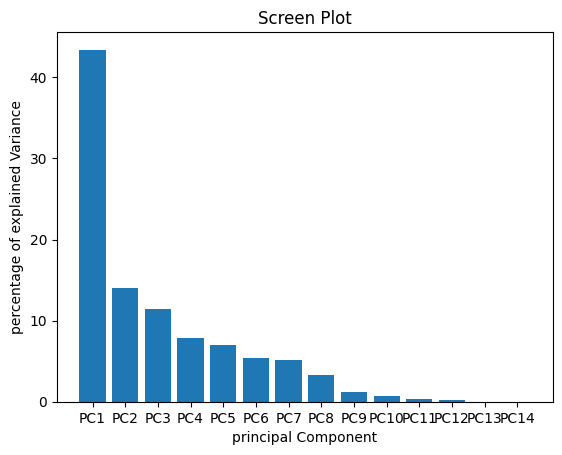

None
(940, 15)


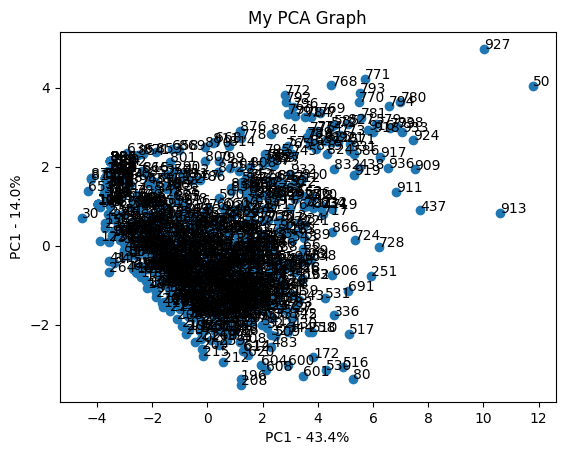

None
[ 0.11503502  0.39430092  0.39538191  0.39475321  0.10015173  0.29806521
  0.22065491  0.27703699  0.03514064  0.29248501  0.22716939  0.22322145
 -0.15331817  0.28827573]
[ 0.3524874  -0.03344026  0.02511778  0.02382185  0.10429383  0.37877943
 -0.12380752 -0.41909056 -0.05288073  0.37053649 -0.0876084  -0.49844264
  0.32345354  0.16517744]


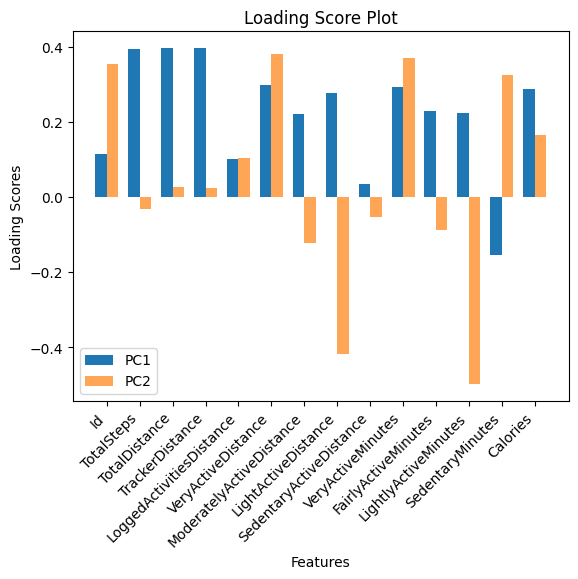

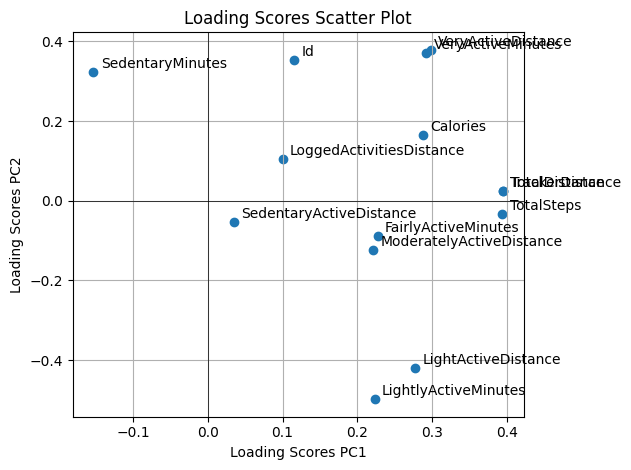

          Id  TotalSteps  TotalDistance  TrackerDistance  \
0   0.115035    0.394301       0.395382         0.394753   
1   0.352487   -0.033440       0.025118         0.023822   
2  -0.114141   -0.017215      -0.045502        -0.041520   
3   0.073984   -0.064072      -0.062226        -0.081901   
4  -0.577608    0.126870       0.127745         0.135146   
5  -0.533282    0.053073       0.010230        -0.003700   
6   0.198683   -0.034327      -0.035978        -0.028246   
7  -0.398513   -0.183235      -0.172151        -0.165974   
8  -0.164864    0.034774       0.223548         0.221933   
9   0.021256    0.157166       0.022239         0.031121   
10 -0.004246   -0.152716      -0.004979        -0.016622   
11  0.006422    0.527438       0.169664         0.164121   
12 -0.004353   -0.676455       0.440376         0.478090   
13  0.000067   -0.018062       0.718704        -0.694653   

    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                   0

In [9]:
# creating dataframe
df=pd.read_csv('dailyActivity_merged.csv')
data=pd.DataFrame(df)
#print(data.head())

#Data preparation,to check if any null values are present

null_values = df.isnull()
null_counts = df.isnull().sum()

# Display the DataFrame with null values highlighted
print("Original DataFrame:")
display(data,'data')


print("\nIdentified Null Values:")
print(null_values)

print("\nNull Value Counts:")
print(null_counts)

#Handling date data type

df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Separate the date column and numerical features
dates = df['ActivityDate']
numerical_features = df.drop('ActivityDate', axis=1)

scaled_data=preprocessing.scale(numerical_features)

#Applying PCA analysis

pca=PCA()
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('percentage of explained Variance')
plt.xlabel('principal Component')
plt.title('Screen Plot')
print(plt.show())
print(data.shape)

pca_df=pd.DataFrame(pca_data, index=range(940),columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC1 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
print(plt.show())

#Loading score of each feature to know which feature have impacted the most variance

loading_scores = pca.components_

# Create a DataFrame with loading scores for each feature
loading_scores_df = pd.DataFrame(loading_scores, columns=numerical_features.columns)
print(loading_scores[0])
print(loading_scores[1])

# Side-by-side bar plot of loading scores for PC1 and PC2
bar_width = 0.35
index = np.arange(len(numerical_features.columns))

plt.bar(index, loading_scores_df.iloc[0, :], width=bar_width, label='PC1')
plt.bar(index + bar_width, loading_scores_df.iloc[1, :], width=bar_width, label='PC2', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Loading Scores')
plt.title('Loading Score Plot')
plt.xticks(index + bar_width / 2, numerical_features.columns, rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.show()

#to print scatter plot

variables = numerical_features.columns  # Replace with your actual variable names

# Scatter plot of loading scores for PC1 and PC2
plt.scatter(loading_scores[0], loading_scores[1])
plt.xlabel("Loading Scores PC1")
plt.ylabel("Loading Scores PC2")
plt.title("Loading Scores Scatter Plot")
# Annotate the points with variable names
label_offset = 0.01  # Adjust this value to control the distance between points and labels
for i, variable in enumerate(variables):
    plt.text(loading_scores[0, i] + label_offset, loading_scores[1, i] + label_offset, variable)

# Add grid for better readability
plt.grid(True)

# Draw lines to divide the plot into four quadrants
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.tight_layout()

# Show the plot
plt.show()


print(loading_scores_df)
